In [78]:
import numpy as np
from astropy import units as u
from astropy.constants import GM_sun
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import random
import cmath
import glob
import scipy.special as ss
warnings.filterwarnings("ignore")

In [79]:
def PutLabels (x_label, y_label, title):
    
    plt.rcParams["figure.figsize"] = (10,10)
    #plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.legend(loc='lower right',prop={'size': 15})
    plt.yticks(size=15)
    plt.xticks(size=15)
    


In [80]:
def Phase(df):
    
    return [float(-1j*np.log(complex(i)/abs(complex(i)))) for i in df.res_adaptive.values]


## Point mass

In [81]:
folder_point_levin='./Results/point/L*'
folders_list_point_levin=sorted(glob.glob(folder_point_levin))
yLin=[0.1, 0.3,1.0,3.0]
w_range=np.linspace(0.001,100,5000)
print(folders_list_point_levin)

w=np.linspace(0.001,100,1000)
dfpoint_lev=pd.read_csv(folders_list_point_levin[0], sep="\t")
point_amp_lev=[float(abs(complex(i))) for i in dfpoint_lev.res_adaptive.values]
point_phase_lev=Phase(dfpoint_lev)

['./Results/point/Levin_point_lens_dist_0.1.txt']


In [82]:
folder_point='./Results/pointmass/*'
folders_list_point=sorted(glob.glob(folder_point))
yLin=[0.1, 0.3,1.0,3.0]
w_range=np.linspace(0.001,100,5000)
folders_list_point

['./Results/pointmass/Analytic_pointmass_lens_dist_0.1.txt',
 './Results/pointmass/Analytic_pointmass_lens_dist_0.3.txt',
 './Results/pointmass/Analytic_pointmass_lens_dist_1.0.txt',
 './Results/pointmass/Analytic_pointmass_lens_dist_3.0.txt',
 './Results/pointmass/amp_analytic_pointmass.png',
 './Results/pointmass/phase_analytic_pointmass.png']

No handles with labels found to put in legend.


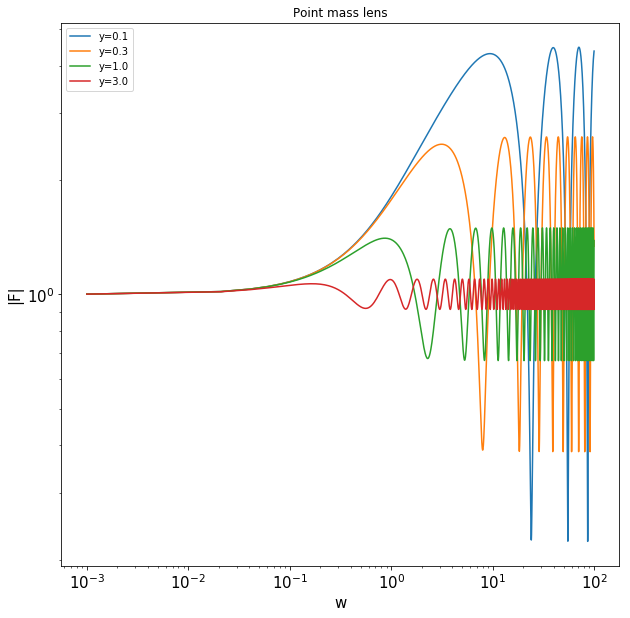

In [83]:
put_labels('w','|F|','Point mass lens')
for fol,y in zip(folders_list_point, yLin):

    dfpoint=pd.read_csv(fol, sep="\t")
    amp=dfpoint.Famp.values
    #phase=dfpoint.Fphase.values

    plt.plot(w_range,amp,'-',label='y='+str(y))
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.savefig('./Results/pointmass/amp_analytic_pointmass.png')
    #plt.show()
#plt.plot(w,point_amp_lev, 'k-', lw=0.7, )

### Point mass check accuracy

No handles with labels found to put in legend.


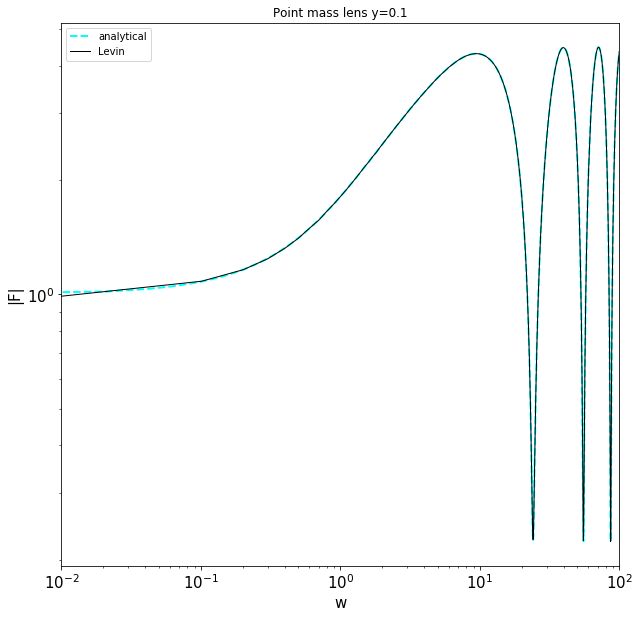

In [84]:
put_labels('w','|F|','Point mass lens y=0.1')
for fol,y in zip(folders_list_point[:1], yLin[:1]):

    dfpoint=pd.read_csv(fol, sep="\t")
    amp=dfpoint.Famp.values
    #phase=dfpoint.Fphase.values

    plt.plot(w_range,amp,'--',label='analytical', color='cyan',lw=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.01, 100)
    plt.legend()
    plt.savefig('./Results/pointmass/amp_analytic_pointmass.png')
    #plt.show()
plt.plot(w,point_amp_lev, 'k-', lw=1, label='Levin' )
plt.legend()
plt.savefig('./Results/point/amp_analytic&levin_pointmass.png')

No handles with labels found to put in legend.


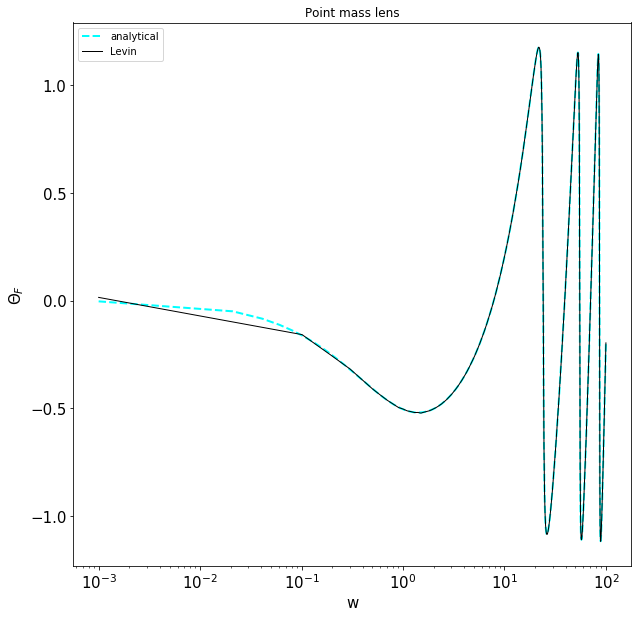

In [85]:
put_labels('w','$\Theta_F$','Point mass lens')
for fol,y in zip(folders_list_point[:1], yLin[:1]):

    dfpoint=pd.read_csv(fol, sep="\t")
    #amp=dfpoint.Famp.values
    phase=dfpoint.Fphase.values

    plt.plot(w_range,phase,'--',label='analytical', color='cyan',lw=2) 
    plt.xscale('log')
    
plt.plot(w,point_phase_lev, 'k-', lw=1, label='Levin' )
plt.legend()
plt.savefig('./Results/pointmass/phase_analytic_pointmass.png')
#plt.show()

No handles with labels found to put in legend.


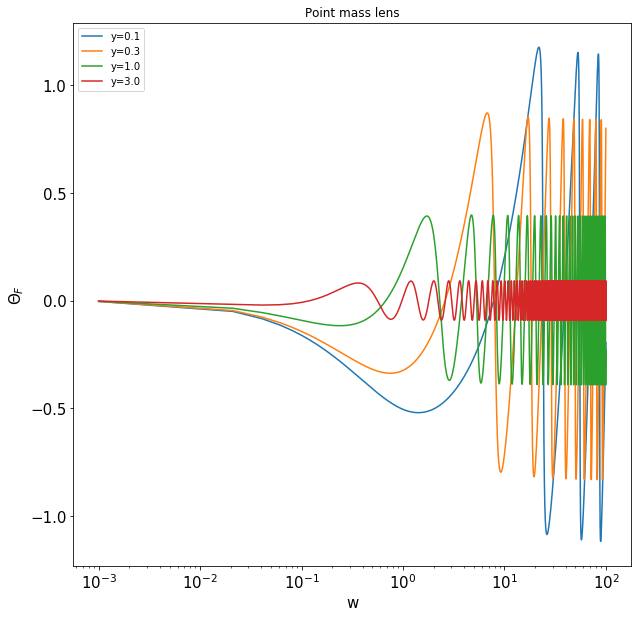

In [86]:
put_labels('w','$\Theta_F$','Point mass lens')
for fol,y in zip(folders_list_point, yLin):

    dfpoint=pd.read_csv(fol, sep="\t")
    #amp=dfpoint.Famp.values
    phase=dfpoint.Fphase.values

    plt.plot(w_range,phase,'-',label='y='+str(y))
    plt.xscale('log')

plt.legend()
plt.savefig('./Results/pointmass/phase_analytic_pointmass.png')
#plt.show()

### SIS

In [87]:
'''
with open('w.txt', 'r') as f:
    w_math = f.read().splitlines()
    
with open('final_levin.txt', 'r') as f:
    math_res = f.read().splitlines()
    
with open('abs03_arg.txt', 'r') as f:
    abs_math = f.read().splitlines()
'''
w=np.linspace(0.001,100,1000)

In [88]:
df=pd.read_csv('./Levin/final_levin.txt', sep="\t")
df_sis=pd.read_csv('./Levin/final_levin_sis.txt', sep="\t")
#df.drop('Unnamed: 0')
df_sis.head()


,Unnamed: 0,res_simple,time_simple,res_fixed,time_fixed,res_adaptive,time_adaptive
0,0,(1.0273382105657238-0.026379957065613097j),0.004987,(1.0238939974521417-0.031840266725977416j),0.080667,(1.0677531415108699-0.05983812105972598j),0.336288
1,1,(1.2907393133065563-0.2939082934431032j),0.002660,(1.2905964351953927-0.29401544033172794j),0.080295,(1.2905428617192776-0.2938315072227648j),0.289253
2,2,(1.422866862421669-0.41457029241123405j),0.004121,(1.422900382533959-0.4144368304090109j),0.084100,(1.4249053186045921-0.41149405488623236j),0.331229
3,3,(1.533537483594096-0.5027231384842299j),0.002510,(1.5334328472027232-0.5027585614514597j),0.104288,(1.5329897703922641-0.5028151639555714j),0.330224
4,4,(1.6343559923677944-0.5722417760767226j),0.004945,(1.634374449820743-0.572299703657658j),0.116620,(1.632374518652666-0.5709196998467694j),0.282711


In [89]:
#df.res_simple.values

In [90]:
#abs_math=[float(i) for i in abs_math]
#w_math=[float(i) for i in w_math]

res_simple=[float(abs(complex(i))) for i in df.res_simple.values]
res_fixed=[float(abs(complex(i))) for i in df.res_fixed.values]
res_adaptive=[float(abs(complex(i))) for i in df.res_adaptive.values]


res_simple_phase=[float(cmath.phase(complex(i))) for i in df.res_simple.values]
res_fixed_phase=[float(cmath.phase(complex(i))) for i in df.res_fixed.values]
res_adaptive_phase=[float(cmath.phase(complex(i))) for i in df.res_adaptive.values]


In [91]:
res_adaptive_sis=[float(abs(complex(i))) for i in df_sis.res_adaptive.values]
res_adaptive_phase_sis=[float(cmath.phase(complex(i))) for i in df_sis.res_adaptive.values]

No handles with labels found to put in legend.


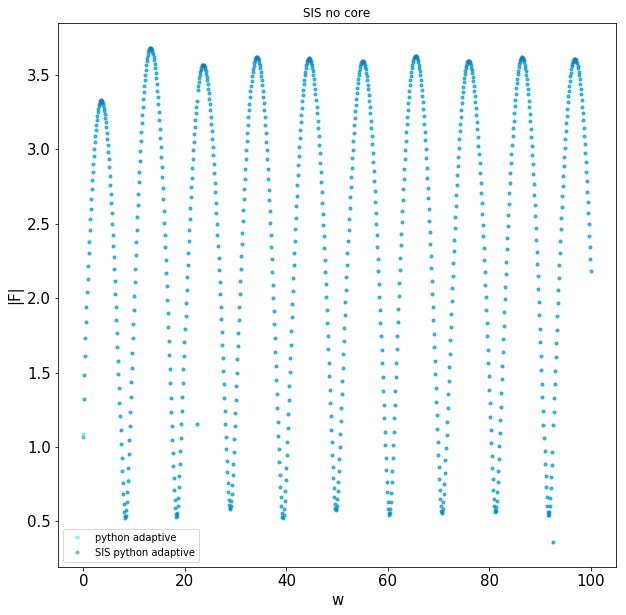

In [92]:
plt.rcParams["figure.figsize"] = (10,10)
put_labels('w','|F|','SIS no core')
#subplot(w,res_simple,label='python simple',c='k')
#subplot(w,res_fixed,label='python fixed',c='pink',style='-')
plt.plot(w,res_adaptive,'.',label='python adaptive',color='cyan', alpha=0.5)
    
plt.plot(w,res_adaptive_sis,'.',label='SIS python adaptive', alpha=0.5)
#plt.plot(w,res_fixed_sis,'.',label='SIS python fixed', alpha=0.2)
#plt.plot(w_math,abs_math, '--',label='mathematica result',color='g',linewidth=0.5, alpha=0.8)
#plt.xlim(1, 100)
plt.legend()
plt.savefig('Results/SIS_module.png')


## REFERENCE MODELS

In [93]:
pointRef=pd.read_csv('./Results/pointmass/Analytic_pointmass_lens_dist_0.3.txt', sep="\t")
pointRefamp=pointRef.Famp.values
pointRefphase=pointRef.Fphase.values
wpoint=np.linspace(0.001,100,5000)


SISRef=pd.read_csv('./Results/SIScore/ref/Levin_SIScore_lens_dist_0.3_a_1_b_0_c_1.txt', sep="\t")
SISRefamp=[float(abs(complex(i))) for i in SISRef.res_adaptive.values]
SISRefphase=[float(cmath.phase(complex(i))) for i in SISRef.res_adaptive.values]

In [94]:
SISRef.head()

,Unnamed: 0,res_adaptive,time_adaptive,w
0,0,(1.0825975688154919-0.05983745522452089j),0.349016,0.001000
1,1,(1.3064982190383434-0.30806385257756047j),0.290776,0.111109
2,2,(1.4446766268195297-0.43667038471186104j),0.297098,0.221218
3,3,(1.5652746647896798-0.5270033872425202j),0.308536,0.331327
4,4,(1.6719065993817364-0.5957256021127024j),0.278699,0.441436


## SIScore --- b=0.5 -- Study on the impact parameter

In [95]:
folderSIS='./Results/SIScore/b=0.5/Levin_SIScore_lens_dist_*'
folders_listSIS=sorted(glob.glob(folderSIS))
yLin=np.linspace(0,1.5,7)
yLin=np.append(0.1,yLin[1:])
w=np.linspace(0.001,100,1000)
folders_listSIS

['./Results/SIScore/b=0.5/Levin_SIScore_lens_dist_0.1_a_1_b_0.5_c_1.txt',
 './Results/SIScore/b=0.5/Levin_SIScore_lens_dist_0.25_a_1_b_0.5_c_1.txt',
 './Results/SIScore/b=0.5/Levin_SIScore_lens_dist_0.5_a_1_b_0.5_c_1.txt',
 './Results/SIScore/b=0.5/Levin_SIScore_lens_dist_1.0_a_1_b_0.5_c_1.txt',
 './Results/SIScore/b=0.5/Levin_SIScore_lens_dist_1.5_a_1_b_0.5_c_1.txt']

No handles with labels found to put in legend.


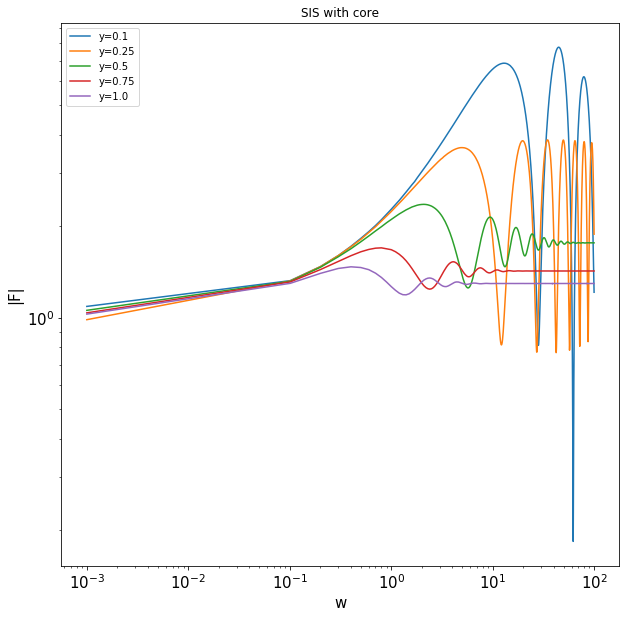

In [96]:
put_labels('w','|F|','SIS with core')
for fol,y in zip(folders_listSIS, yLin):
    dfCore=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfCore.res_adaptive.values]
    plt.plot(w,amp,'-',label='y='+str(y))
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlim(1, 100)
    #plt.ylim(1, 100)
#plt.plot(wpoint,pointRefamp, label='point mass', color='k', lw=0.7)

plt.legend()
plt.savefig('./Results/SIScore/SIS_core_y=0.3.png')
plt.show()

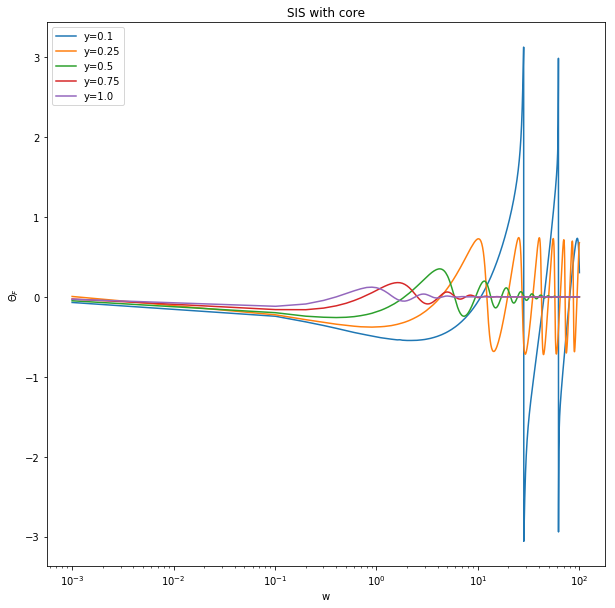

In [97]:
#create_plots('w','|F|','SIS with core')
for fol,y in zip(folders_listSIS, yLin):
    dfCore=pd.read_csv(fol, sep="\t")
    phaseSIS=Phase(dfCore)
    plt.plot(w,phaseSIS,'-',label='y='+str(y))
    plt.xscale('log')
    #plt.yscale('log')
    #plt.xlim(1, 100)
    #plt.ylim(1, 100)
     
#plt.plot(wpoint,pointRefphase, label='point mass', color='k', lw=0.7)
plt.title('SIS with core')
plt.xlabel('w', fontsize=10)
plt.ylabel('$\Theta_F$', fontsize=10)
plt.legend()
plt.savefig('Results/SIScore/phase_SIS_core_y=0.3.png')
plt.show()

In [174]:
'''
w_range=np.linspace(0.001,1000,10000)
#create_plots('w','|F|','SIS with core')


dfCore=pd.read_csv('./Results/SIScore/Levin_SIScore_lens_dist_0.3_a_1_b_0.25_c_1.txt', sep="\t")
#amp=[float(abs(complex(i))) for i in dfCore.res_adaptive.values]
phase=[float(cmath.phase(complex(i))) for i in dfCore.res_adaptive.values]
plt.plot(w_range,phase,'-',label='b='+str(b))
plt.xscale('log')
#plt.yscale('log')
#plt.xlim(1, 100)
#plt.ylim(1, 100)
     
plt.plot(wpoint,pointRefphase, label='point mass', color='k', lw=0.7)
plt.title('SIS with core')
plt.xlabel('w', fontsize=10)
plt.ylabel('$\Theta_F$', fontsize=10)
plt.legend()
plt.savefig('Results/SIScore/phase_SIS_core_study_upto0.9.png')
plt.show()
'''

'\nw_range=np.linspace(0.001,1000,10000)\n#create_plots(\'w\',\'|F|\',\'SIS with core\')\n\n\ndfCore=pd.read_csv(\'./Results/SIScore/Levin_SIScore_lens_dist_0.3_a_1_b_0.25_c_1.txt\', sep="\t")\n#amp=[float(abs(complex(i))) for i in dfCore.res_adaptive.values]\nphase=[float(cmath.phase(complex(i))) for i in dfCore.res_adaptive.values]\nplt.plot(w_range,phase,\'-\',label=\'b=\'+str(b))\nplt.xscale(\'log\')\n#plt.yscale(\'log\')\n#plt.xlim(1, 100)\n#plt.ylim(1, 100)\n     \nplt.plot(wpoint,pointRefphase, label=\'point mass\', color=\'k\', lw=0.7)\nplt.title(\'SIS with core\')\nplt.xlabel(\'w\', fontsize=10)\nplt.ylabel(\'$\\Theta_F$\', fontsize=10)\nplt.legend()\nplt.savefig(\'Results/SIScore/phase_SIS_core_study_upto0.9.png\')\nplt.show()\n'

##  SIScore -- y=0.3 - study on the core

In [111]:
def beta(theta,b):
    E_r=1
    return theta - theta/np.sqrt(b**2+theta**2)

In [113]:
folder='./Results/SIScore/y=0.3/Levin_SIScore_lens_dist_*'
folders_list=sorted(glob.glob(folder))
bLin=[0,0.25,0.5,0.75,1,1.5]
w=np.linspace(0.001,110,1000)
folders_list

['./Results/SIScore/y=0.3/Levin_SIScore_lens_dist_0.3_a_1_b_0.25_c_1.txt',
 './Results/SIScore/y=0.3/Levin_SIScore_lens_dist_0.3_a_1_b_0.5_c_1.txt',
 './Results/SIScore/y=0.3/Levin_SIScore_lens_dist_0.3_a_1_b_0.75_c_1.txt',
 './Results/SIScore/y=0.3/Levin_SIScore_lens_dist_0.3_a_1_b_0_c_1.txt',
 './Results/SIScore/y=0.3/Levin_SIScore_lens_dist_0.3_a_1_b_1.0_c_1.txt',
 './Results/SIScore/y=0.3/Levin_SIScore_lens_dist_0.3_a_1_b_1.5_c_1.txt']

In [114]:
bLin

[0, 0.25, 0.5, 0.75, 1, 1.5]

No handles with labels found to put in legend.


ValueError: x and y must have same first dimension, but have shapes (1000,) and (990,)

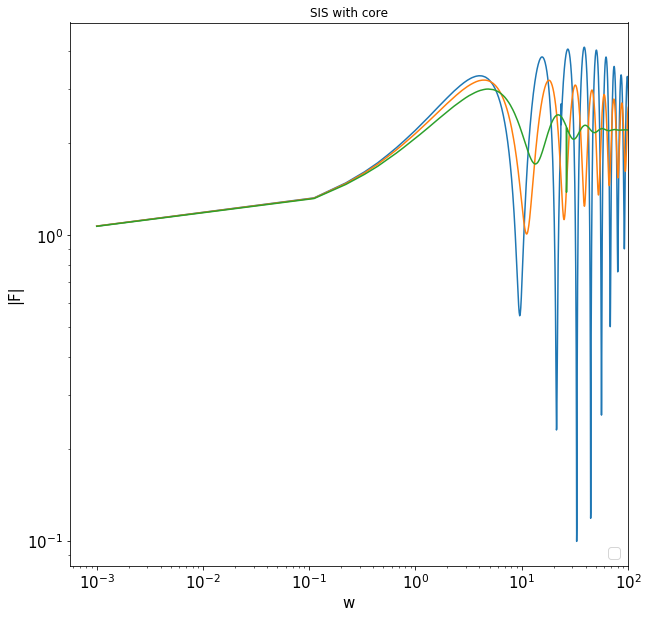

In [115]:
put_labels('w','|F|','SIS with core')
for fol,b in zip(folders_list, bLin):
    dfCore=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfCore.res_adaptive.values]
    #phase=[float(cmath.phase(complex(i))) for i in dfCore.res_adaptive.values]
    #if y==1.25 or y==1:
    #    pass 
    #else:
    plt.plot(w,amp,'-',label='b='+str(b))
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0, 100)
    #plt.ylim(1, 100)
#plt.plot(wpoint,pointRefamp, label='point mass', color='k', lw=0.7)

plt.legend()
plt.savefig('./Results/SIScore/amp_SIS_core_y=0.3_maxw100.png')
plt.show()

In [ ]:
#create_plots('w','|F|','SIS with core')
for fol,b in zip(folders_list, bLin):
    dfCore=pd.read_csv(fol, sep="\t")
    #amp=[float(abs(complex(i))) for i in dfCore.res_adaptive.values]
    phase=[float(cmath.phase(complex(i))) for i in dfCore.res_adaptive.values]
    plt.plot(w,phase,'-',label='b='+str(b))
    plt.xscale('log')
    #plt.yscale('log')
    #plt.xlim(1, 100)
    #plt.ylim(1, 100)
     
#plt.plot(wpoint,pointRefphase, label='point mass', color='k', lw=0.7)
plt.title('SIS with core')
plt.xlabel('w', fontsize=10)
plt.ylabel('$\Theta_F$', fontsize=10)
plt.legend()
plt.savefig('Results/SIScore/phase_SIS_core_y=0.3_maxw100.png')
plt.show()

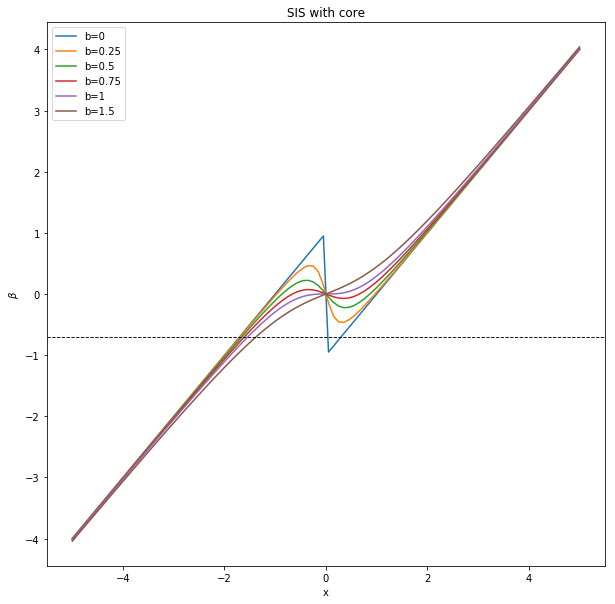

In [116]:
theta=np.linspace(-5,5,100)
ax = plt.gca()
for b in bLin:
    #plt.plot(theta,beta(theta,b),'-',label='b='+str(b))
    vline_color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(theta,beta(theta,b),'-',label='b='+str(b), color=vline_color)
plt.axhline(beta(0.3,0),ls='--',linewidth=0.9, color='k')
    #plt.xlim(1, 100)
    
#plt.axhline(0,color='k',ls='-',linewidth=1)
#plt.axvline(0,color='k',ls='-',linewidth=1)
#plt.axhline(beta(0.51),color='b',ls='--',linewidth=0.5, label=r'$\beta$')
plt.title('SIS with core')
plt.xlabel('x', fontsize=10)
plt.ylabel(r'$\beta$', fontsize=10)
plt.legend()
#plt.axes()
plt.savefig('Results/SIScore/lens_eq_y=0.3.png')
plt.show()

### y=0.3 with w up to 1000

In [181]:
folder='./Results/SIScore/y=0.3_w1000/Levin_SIScore_lens_dist_*'
folders_list=sorted(glob.glob(folder))
bLin=np.linspace(0,1.5,7)
w=np.linspace(0.001,1000,1000)
folders_list

['./Results/SIScore/y=0.3_w1000/Levin_SIScore_lens_dist_0.3_a_1_b_0.0_c_1.txt',
 './Results/SIScore/y=0.3_w1000/Levin_SIScore_lens_dist_0.3_a_1_b_0.25_c_1.txt',
 './Results/SIScore/y=0.3_w1000/Levin_SIScore_lens_dist_0.3_a_1_b_0.5_c_1.txt',
 './Results/SIScore/y=0.3_w1000/Levin_SIScore_lens_dist_0.3_a_1_b_0.75_c_1.txt',
 './Results/SIScore/y=0.3_w1000/Levin_SIScore_lens_dist_0.3_a_1_b_1.0_c_1.txt',
 './Results/SIScore/y=0.3_w1000/Levin_SIScore_lens_dist_0.3_a_1_b_1.25_c_1.txt',
 './Results/SIScore/y=0.3_w1000/Levin_SIScore_lens_dist_0.3_a_1_b_1.5_c_1.txt']

No handles with labels found to put in legend.


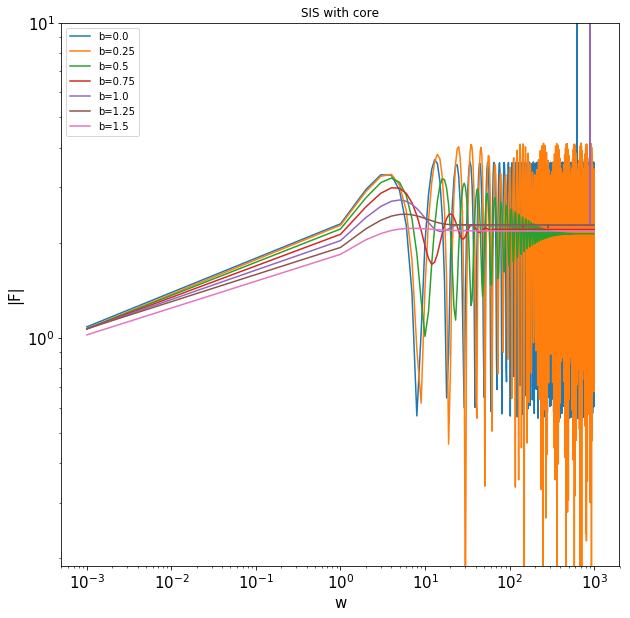

In [182]:
put_labels('w','|F|','SIS with core')
for fol,b in zip(folders_list, bLin):
    dfCore=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfCore.res_adaptive.values]
    #phase=[float(cmath.phase(complex(i))) for i in dfCore.res_adaptive.values]
    if y==1.25 or y==1:
        pass 
    else:
        plt.plot(w,amp,'-',label='b='+str(b))
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlim(0, 100)
    plt.ylim(0, 10)
#plt.plot(wpoint,pointRefamp, label='point mass', color='k', lw=0.7)

plt.legend()
plt.savefig('./Results/SIScore/amp_SIS_core_y=0.3.png')
plt.show()

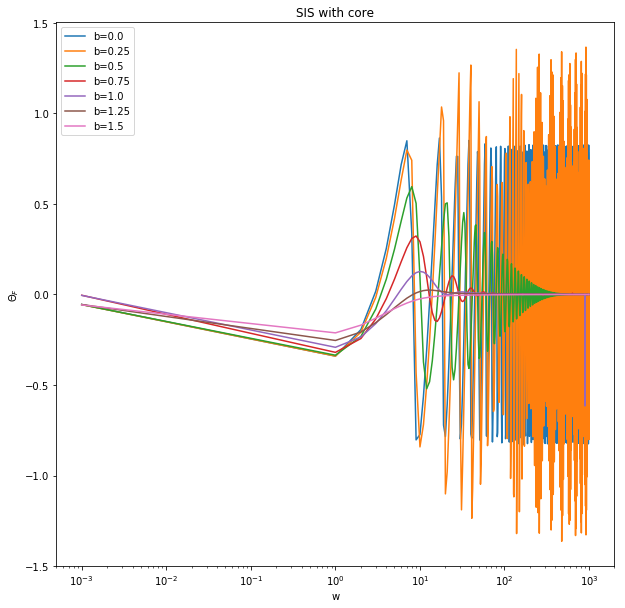

In [183]:
#create_plots('w','|F|','SIS with core')
for fol,b in zip(folders_list, bLin):
    dfCore=pd.read_csv(fol, sep="\t")
    #amp=[float(abs(complex(i))) for i in dfCore.res_adaptive.values]
    phase=[float(cmath.phase(complex(i))) for i in dfCore.res_adaptive.values]
    plt.plot(w,phase,'-',label='b='+str(b))
    plt.xscale('log')
    #plt.yscale('log')
    #plt.xlim(1, 100)
    #plt.ylim(1, 100)
     
#plt.plot(wpoint,pointRefphase, label='point mass', color='k', lw=0.7)
plt.title('SIS with core')
plt.xlabel('w', fontsize=10)
plt.ylabel('$\Theta_F$', fontsize=10)
plt.legend()
plt.savefig('Results/SIScore/phase_SIS_core_y=0.3.png')
plt.show()

## Power-law lens  
## 0-1

In [343]:
w=np.linspace(0.001,100,1000)
folder_power='./Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3*'
folders_list_power=sorted(glob.glob(folder_power))
pLin=['0.01', '0.25', '0.5', '0.75', '0.9']
'''
for i in range(len(folders_list_power)):
    pLin.append(folders_list_power[i][-8:][:4])
    
w=np.linspace(0.001,100,1000)
'''
folders_list_power


['./Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3_p_0.01.txt',
 './Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3_p_0.25.txt',
 './Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3_p_0.5.txt',
 './Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3_p_0.75.txt',
 './Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3_p_0.9.txt']

In [344]:
pLin

['0.01', '0.25', '0.5', '0.75', '0.9']

No handles with labels found to put in legend.


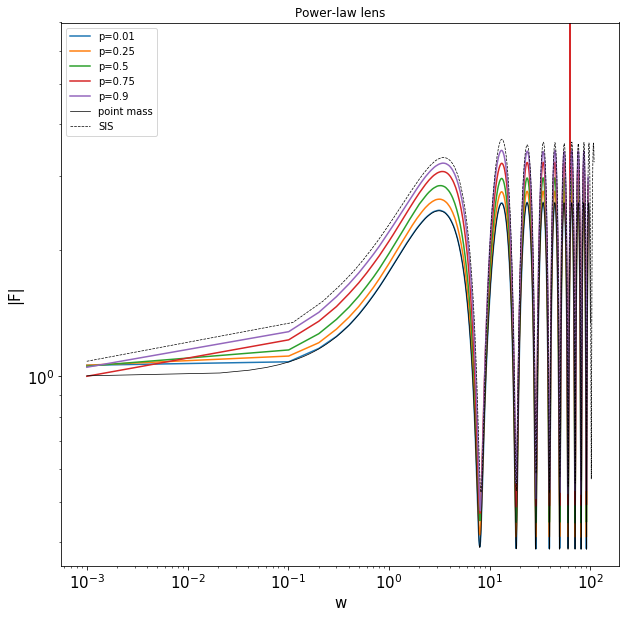

In [345]:
put_labels('w','|F|','Power-law lens')
for fol,p in zip(folders_list_power, pLin):
    
    dfPower=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfPower.res_adaptive.values]
    plt.plot(w[:-50],amp[:-50],'-',label='p='+str(p))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0.,7)
plt.plot(wpoint,pointRefamp, label='point mass', color='k', lw=0.7)
plt.plot(SISRef.w.values,SISRefamp, 'k--', label='SIS',linewidth='0.7')
plt.legend()
plt.savefig('./Results/powerlaw/0-1/amp_powerlaw_range_01.png')
plt.show()



No handles with labels found to put in legend.


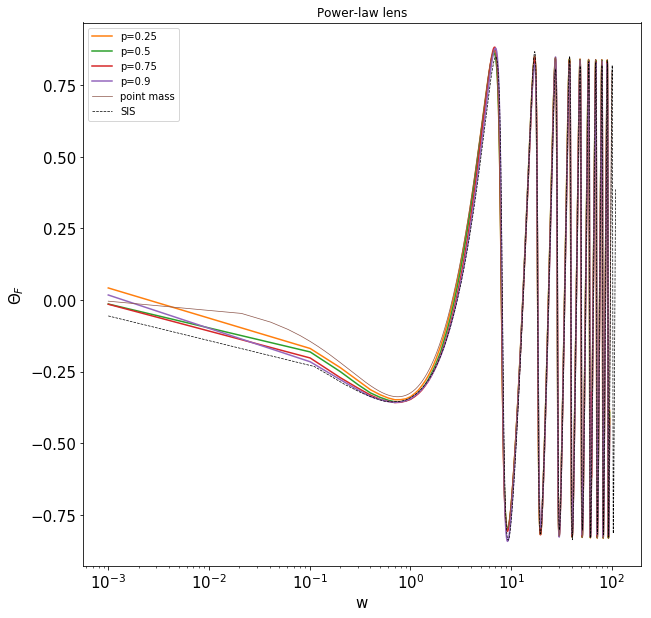

In [346]:
put_labels('w','$\Theta_F$','Power-law lens')
ax = plt.gca()
vline_color = next(ax._get_lines.prop_cycler)['color']
for fol,p in zip(folders_list_power[1:], pLin[1:]):
    vline_color = next(ax._get_lines.prop_cycler)['color']
    #plt.plot(theta,beta(theta,b),'-',label='b='+str(b), color=vline_color)
    dfPower=pd.read_csv(fol, sep="\t")
    phase=[float(cmath.phase(complex(i))) for i in dfPower.res_adaptive.values]
    plt.plot(w[:-50],phase[:-50],'-',label='p='+str(p), color=vline_color)
    plt.xscale('log')
    #plt.xlim(10, 100)

plt.plot(wpoint,pointRefphase, label='point mass', lw=0.7)
plt.plot(SISRef.w.values,SISRefphase, 'k--', label='SIS', lw=0.7)
plt.legend()
plt.savefig('./Results/powerlaw/0-1/phase_powerlaw_range_01.png')
plt.show()

## Power-law lens  
## 1-2

In [188]:
folder_power='./Results/powerlaw/1-2/Levin_powerlaw_lens_dist_0.3_*'
folders_list_power=sorted(glob.glob(folder_power))
pLin=np.linspace(1,2,5)
w=np.linspace(0.001,100,1000)

In [189]:
folders_list_power

['./Results/powerlaw/1-2/Levin_powerlaw_lens_dist_0.3_p_1.0.txt',
 './Results/powerlaw/1-2/Levin_powerlaw_lens_dist_0.3_p_1.25.txt',
 './Results/powerlaw/1-2/Levin_powerlaw_lens_dist_0.3_p_1.5.txt',
 './Results/powerlaw/1-2/Levin_powerlaw_lens_dist_0.3_p_1.75.txt']

## consistency check

No handles with labels found to put in legend.


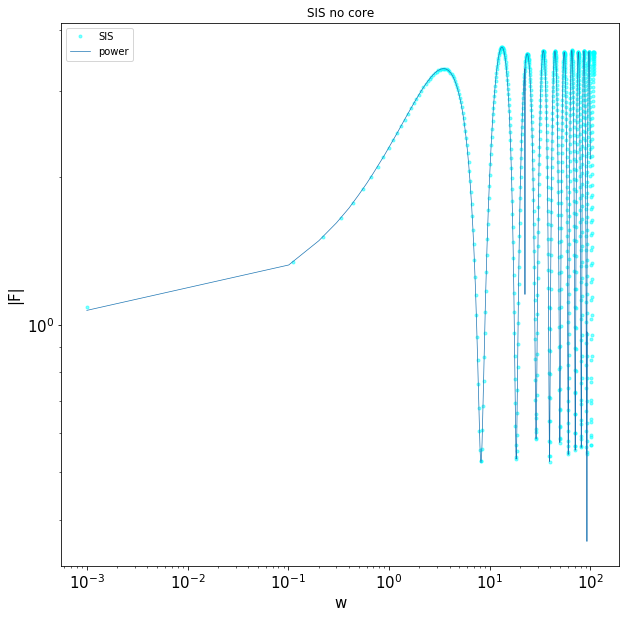

In [190]:
dfpower_1=pd.read_csv(folders_list_power[0], sep="\t")
amppower_1=[float(abs(complex(i))) for i in dfpower_1.res_adaptive.values]


put_labels('w','|F|','SIS no core')
plt.plot(SISRef.w.values,SISRefamp,'.',label='SIS',color='cyan', alpha=0.5)
plt.plot(w,amppower_1,label='power',lw=0.7)
plt.xscale('log')
plt.yscale('log')

#plt.xlim(1, 100)
plt.legend()
#plt.savefig('SIS_module.png')


No handles with labels found to put in legend.


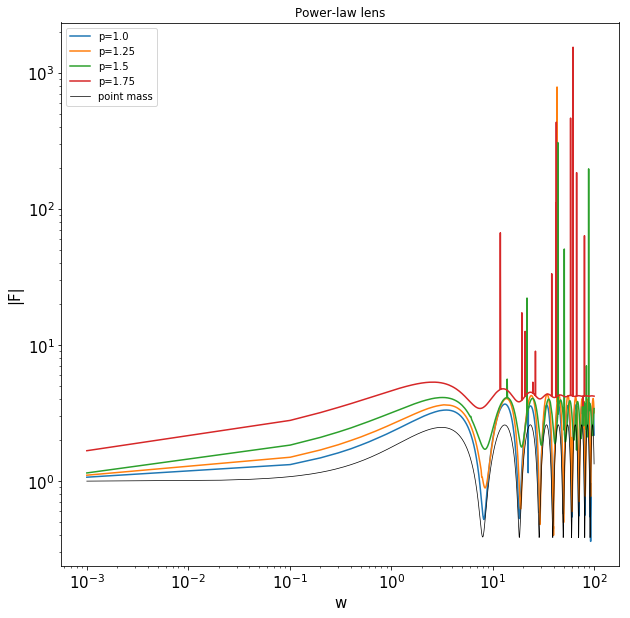

In [191]:
put_labels('w','|F|','Power-law lens')

for fol,p in zip(folders_list_power, pLin):
    
    dfPower=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfPower.res_adaptive.values]
    plt.plot(w,amp,'-',label='p='+str(p))
    plt.xscale('log')
    plt.yscale('log')
    
#plt.ylim(0.35,5.5)
plt.plot(wpoint,pointRefamp, label='point mass', color='k',lw=0.7)
#plt.plot(w,SISRefamp, 'k--', label='SIS',linewidth='0.7')
plt.legend()
plt.savefig('./Results/powerlaw/1-2/amp_powerlaw_range_12.png')
plt.show()



No handles with labels found to put in legend.


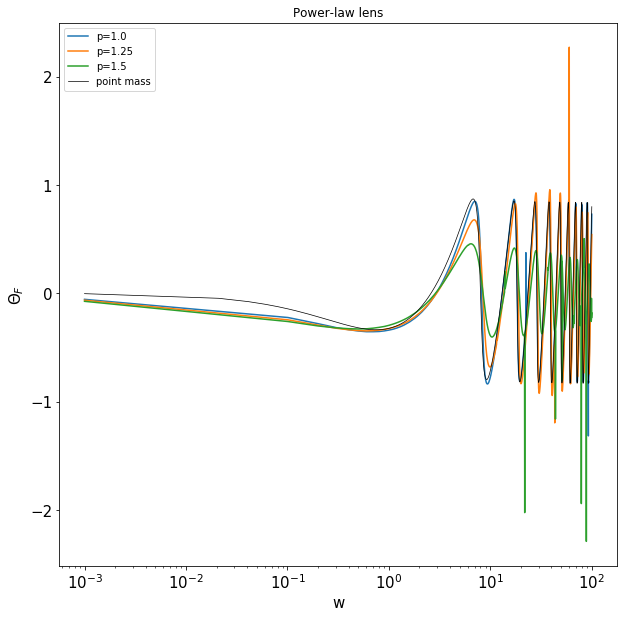

In [192]:
put_labels('w','$\Theta_F$','Power-law lens')
for fol,p in zip(folders_list_power[:-1], pLin[:-1]):
    dfPower=pd.read_csv(fol, sep="\t")
    phase=[float(cmath.phase(complex(i))) for i in dfPower.res_adaptive.values]
    plt.plot(w,phase,'-',label='p='+str(p))
    plt.xscale('log')
    #plt.xlim(1, 100)

plt.plot(wpoint,pointRefphase, label='point mass', color='k', lw=0.7)
plt.legend()
plt.savefig('./Results/powerlaw/1-2/phase_powerlaw_range_12.png')
plt.show()

## Softened power law lens p=1

In [251]:
folder_soft='./Results/softenedpowerlaw/p=1/Levin*'
folders_list_soft=sorted(glob.glob(folder_soft))
bLin=[0.1,0.25]
bLin=np.append(bLin,np.linspace(0.5,2.5,5))
w_range=np.linspace(0.001,100,1000)
folders_list_soft

['./Results/softenedpowerlaw/p=1/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.1_c_1_p_1.txt',
 './Results/softenedpowerlaw/p=1/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.25_c_1_p_1.txt',
 './Results/softenedpowerlaw/p=1/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.txt',
 './Results/softenedpowerlaw/p=1/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_1.5_c_1_p_1.txt',
 './Results/softenedpowerlaw/p=1/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_2.5_c_1_p_1.txt']

In [252]:
bLin

array([0.1 , 0.25, 0.5 , 1.  , 1.5 , 2.  , 2.5 ])

No handles with labels found to put in legend.


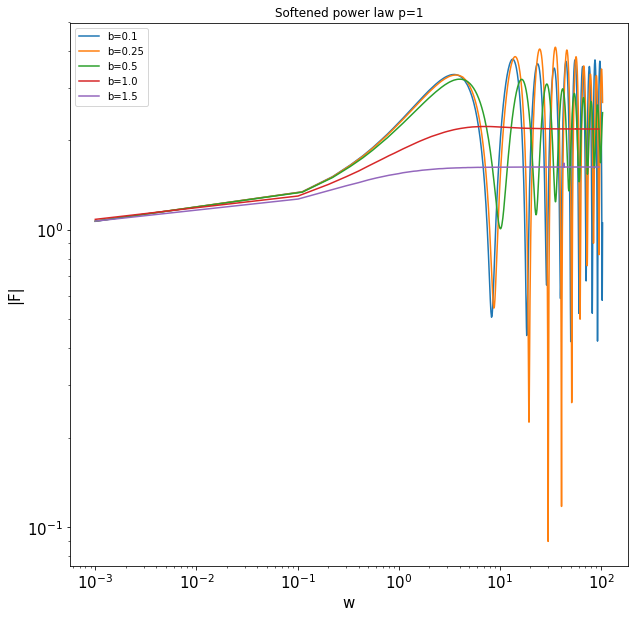

In [253]:
put_labels('w','|F|','Softened power law p=1')
for fol,b in zip(folders_list_soft, bLin):

    dfSoft=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfSoft.res_adaptive.values]
    w=dfSoft.w.values
    plt.plot(w[:-50],amp[:-50],'-',label='b='+str(b))
    plt.xscale('log')
    plt.yscale('log')

    #plt.xlim(10,100)
    #plt.show()
#plt.plot(SISRef.w.values,SISRefamp, 'k--', label='SIS',linewidth='0.7')
#plt.plot(wpoint,pointRefamp, label='point mass', color='k',lw=0.7)
plt.legend()
plt.savefig('./Results/softenedpowerlaw/p=1/amp_softenedpowerlaw_p=1.png')

No handles with labels found to put in legend.


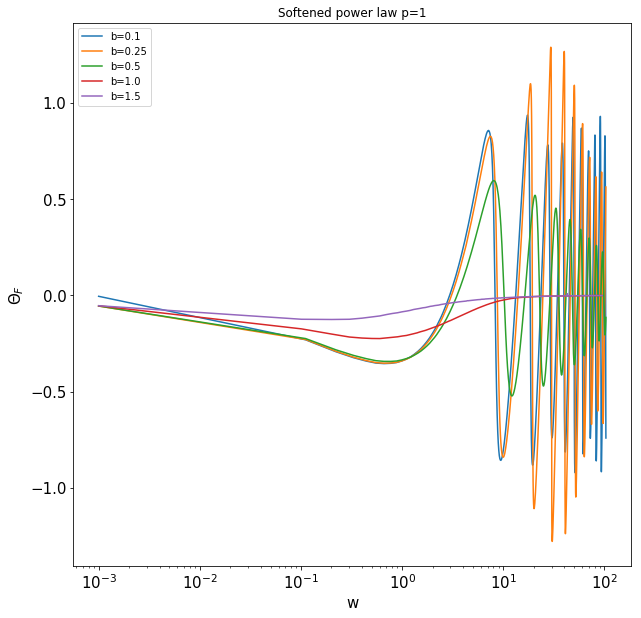

In [254]:
put_labels('w','$\Theta_F$','Softened power law p=1')
for fol,b in zip(folders_list_soft, bLin):

    dfSoft=pd.read_csv(fol, sep="\t")
    phase=[float(cmath.phase(complex(i))) for i in dfSoft.res_adaptive.values]    
    plt.plot(dfSoft.w.values[:-50],phase[:-50],'-',label='b='+str(b))
    plt.xscale('log')
    
#plt.plot(SISRef.w.values,SISRefphase, 'k--', label='SIS',linewidth='0.7')
plt.legend()
plt.savefig('./Results/softenedpowerlaw/p=1/phase_softenedpowerlaw_p=1.png')
    #plt.show()

## Softened power law lens

### b=0.5

In [70]:
folder_soft='./Results/softenedpowerlaw/b=0.5/Levin*'
folders_list_soft=sorted(glob.glob(folder_soft))
pLin=np.linspace(0.5,2.5,5)
pLin= [ round(p,2) for p in pLin]
w_range=np.linspace(0.001,1000,1000)
folders_list_soft

['./Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_0.5.txt',
 './Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.0.txt',
 './Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.5.txt',
 './Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_2.0.txt',
 './Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_2.5.txt']

In [71]:
pLin

[0.5, 1.0, 1.5, 2.0, 2.5]

No handles with labels found to put in legend.


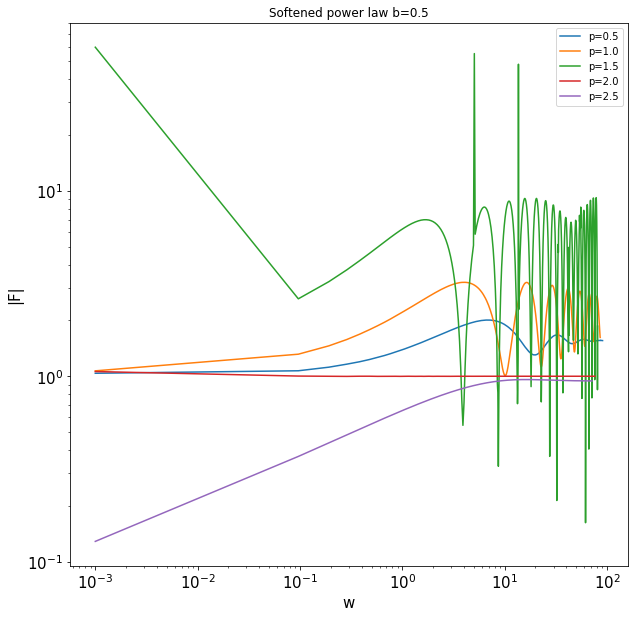

In [72]:
put_labels('w','|F|','Softened power law b=0.5')
for fol,p in zip(folders_list_soft, pLin):

    dfSoft=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfSoft.res_adaptive.values]
    plt.plot(dfSoft.w.values[:-50],amp[:-50],'-',label='p='+str(p))
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlim(10,100)
    #plt.show()
#plt.plot(SISRef.w.values,SISRefamp, 'k--', label='SIS',linewidth='0.5')
plt.legend()
plt.savefig('./Results/softenedpowerlaw/b=0.5/amp_analytic_softenedpowerlaw_b=0.png')

In [131]:

dfSoft=pd.read_csv('./Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.5.txt', sep="\t")
def Smoothing(amp,w):
        
    w=np.ndarray.tolist(w)
    flag=[]
    for k in range(len(w)-1):
        if abs(amp[k]-amp[k-1]) > 5. and  abs(amp[k]-amp[k+1])>5:
            print(k)
            

In [132]:
Smoothing([float(abs(complex(i))) for i in dfSoft.res_adaptive.values],dfSoft.w.values)

5
74
438
698
930


No handles with labels found to put in legend.


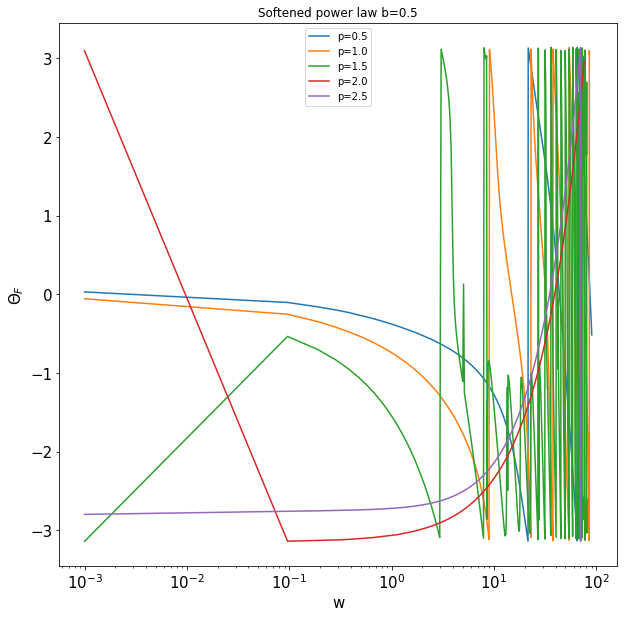

In [73]:
put_labels('w','$\Theta_F$','Softened power law b=0.5')
for fol,p in zip(folders_list_soft, pLin):

    dfSoft=pd.read_csv(fol, sep="\t")
    phase=[float(cmath.phase(complex(i))) for i in dfSoft.res_adaptive.values]    
    plt.plot(dfSoft.w.values[:-50],phase[:-50],'-',label='p='+str(p))
    plt.xscale('log')


    #plt.show()
#plt.plot(SISRef.w.values,SISRefphase, 'k--', label='SIS',linewidth='0.7')
plt.legend()
plt.savefig('./Results/softenedpowerlaw/b=0.5/phase_analytic_softenedpowerlaw_b=0.png')


## Softened power law kappa 
### p=1 different b -> different cut off radii

In [74]:
folder_pk='./Results/softenedpowerlawkappa/p=1/Levin*'
folders_list_pk=sorted(glob.glob(folder_pk))
bLin=np.linspace(0.25,1,4)
w_range=np.linspace(0.001,100,1000)
folders_list_pk

[]

In [521]:
dfpk.head()

,Unnamed: 0,res_adaptive,time_adaptive,w
0,0,(1.2988773024164852-0.12315041302800096j),1.785091,0.001000
1,1,(1.9663298976500443-0.447375050859323j),0.321345,1.011091
2,2,(2.0635892976223262-0.6367212129681187j),0.308959,2.021182
3,3,(2.0853572147691555-0.8118316539582404j),0.324150,3.031273
4,4,(2.0636729228956767-0.9809234883874538j),0.316980,4.041364


No handles with labels found to put in legend.


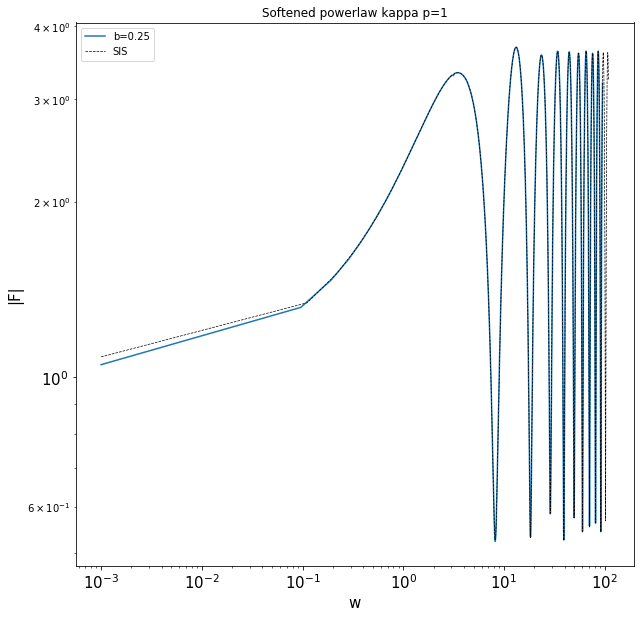

In [29]:
put_labels('w','|F|','Softened powerlaw kappa p=1')
for fol,b in zip(folders_list_pk, bLin):

    dfpk=pd.read_csv(fol, sep="\t")   
    amp=[float(abs(complex(i))) for i in dfpk.res_adaptive.values]
    plt.plot(dfpk.w.values,amp,'-',label='b='+str(b))
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlim(1,100)
    #plt.show()
plt.plot(SISRef.w.values,SISRefamp, 'k--', label='SIS',linewidth='0.7')
#plt.plot(wpoint,pointRefamp, 'k-',label='point mass',linewidth='0.7')
plt.legend()
plt.savefig('./Results/softenedpowerlawkappa/p=1/amp_softenedpowerlaw.png')

No handles with labels found to put in legend.


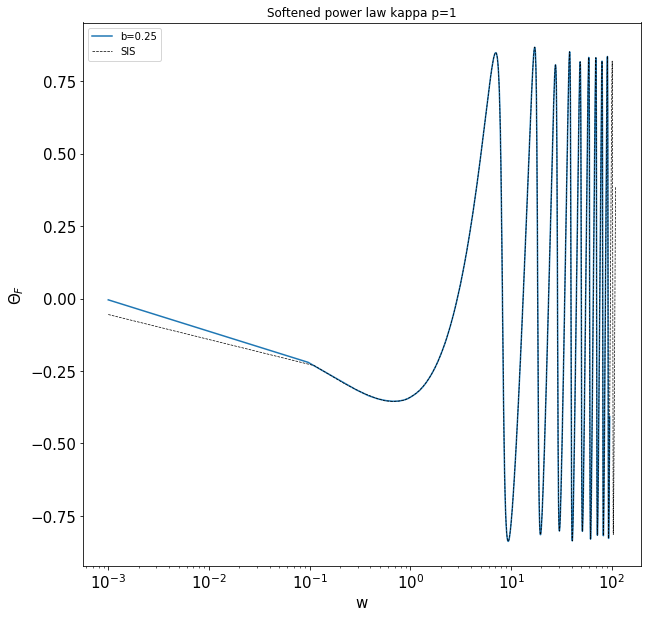

In [31]:
put_labels('w','$\Theta_F$','Softened power law kappa p=1')
for fol,b in zip(folders_list_pk, bLin):

    dfpk=pd.read_csv(fol, sep="\t")
    phase=[float(cmath.phase(complex(i))) for i in dfpk.res_adaptive.values]    
    plt.plot(dfpk.w.values,phase,'-',label='b='+str(b))
    plt.xscale('log')
    #plt.show()

plt.plot(SISRef.w.values,SISRefphase, 'k--', label='SIS',linewidth='0.7')
#plt.plot(wpoint,pointRefphase, 'k-',label='point mass',linewidth='0.7')
plt.legend()
plt.savefig('./Results/softenedpowerlawkappa/p=1/phase_softenedpowerlaw.png')


### Softened power law kappa b=0.5 different p -> different power laws

In [133]:
folder_pk='./Results/softenedpowerlawkappa/b=0.5/Levin*'
folders_list_pk=sorted(glob.glob(folder_pk))
w_range=np.linspace(0.001,100,1000)
pLin=[-1,-2,0.5,1,1.5]
folders_list_pk

['./Results/softenedpowerlawkappa/b=0.5/Levin_softenedpowerlawkappa_lens_dist_0.3_a_1_b_0.5_p_-1.0.txt',
 './Results/softenedpowerlawkappa/b=0.5/Levin_softenedpowerlawkappa_lens_dist_0.3_a_1_b_0.5_p_-2.0.txt',
 './Results/softenedpowerlawkappa/b=0.5/Levin_softenedpowerlawkappa_lens_dist_0.3_a_1_b_0.5_p_0.5.txt',
 './Results/softenedpowerlawkappa/b=0.5/Levin_softenedpowerlawkappa_lens_dist_0.3_a_1_b_0.5_p_1.0.txt',
 './Results/softenedpowerlawkappa/b=0.5/Levin_softenedpowerlawkappa_lens_dist_0.3_a_1_b_0.5_p_1.5.txt']

No handles with labels found to put in legend.


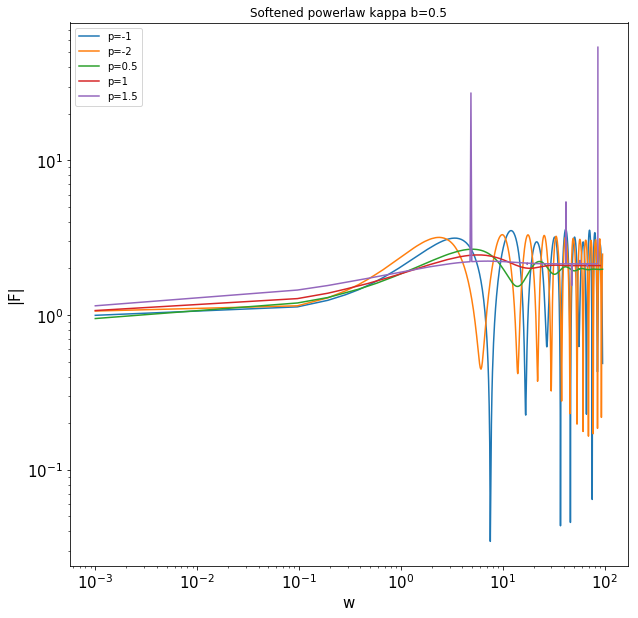

In [134]:
put_labels('w','|F|','Softened powerlaw kappa b=0.5')
for fol,p in zip(folders_list_pk, pLin):

    dfpk=pd.read_csv(fol, sep="\t")   
    amp=[float(abs(complex(i))) for i in dfpk.res_adaptive.values]
    plt.plot(dfpk.w.values,amp,'-',label='p='+str(p))
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlim(1,100)
#plt.plot(SISRef.w.values,SISRefamp, 'k--', label='SIS',linewidth='0.7')
#plt.plot(wpoint,pointRefamp, 'k-',label='point mass',linewidth='0.7')
plt.legend()
plt.savefig('./Results/softenedpowerlawkappa/b=0.5/Amp_softenedpowerlawkappa.png')

No handles with labels found to put in legend.


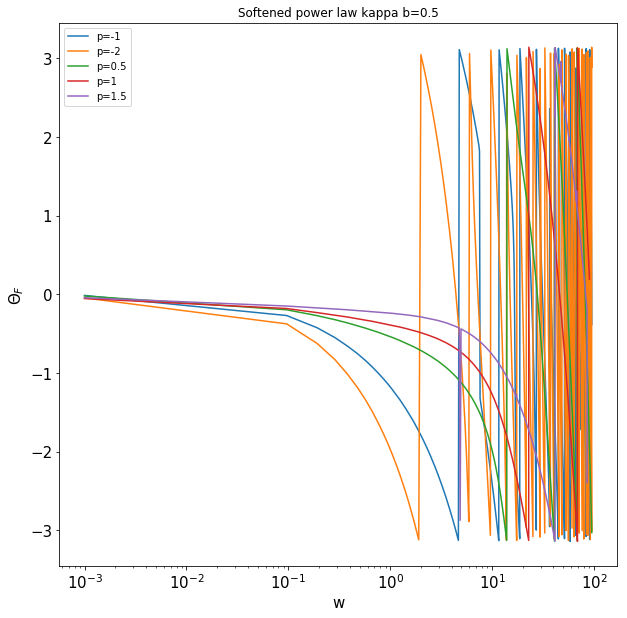

In [135]:
put_labels('w','$\Theta_F$','Softened power law kappa b=0.5')
for fol,p in zip(folders_list_pk, pLin):

    dfpk=pd.read_csv(fol, sep="\t")
    phase=[float(cmath.phase(complex(i))) for i in dfpk.res_adaptive.values]    
    plt.plot(dfpk.w.values,phase,'-',label='p='+str(p))
    plt.xscale('log')
   
    #plt.show()

#plt.plot(SISRef.w.values,SISRefphase, 'k--', label='SIS',linewidth='0.7')
#plt.plot(wpoint,pointRefphase, 'k-',label='point mass',linewidth='0.7')
plt.legend()
plt.savefig('./Results/softenedpowerlawkappa/b=0.5/phase_softenedpowerlawkappa')

In [54]:
p=3
a=1
b=0.5
x=1
t1= 1/p**2 * a**(2-p)*(x+1e-5)**p *ss.hyp2f1(-p/2, -p/2, 1-p/2, -b**2/(x+1e-5)**2)
t2= 1/p*a**(2-p)*b**p*np.log((x+1e-5)/b)
t3= 1/(2*p) * a**(2-p)*b**p*(np.euler_gamma-ss.digamma(-p/2))            
pot=t1 - t2 - t3

In [55]:
pot

0.20214838443680197

No handles with labels found to put in legend.


NameError: name 'subplot' is not defined

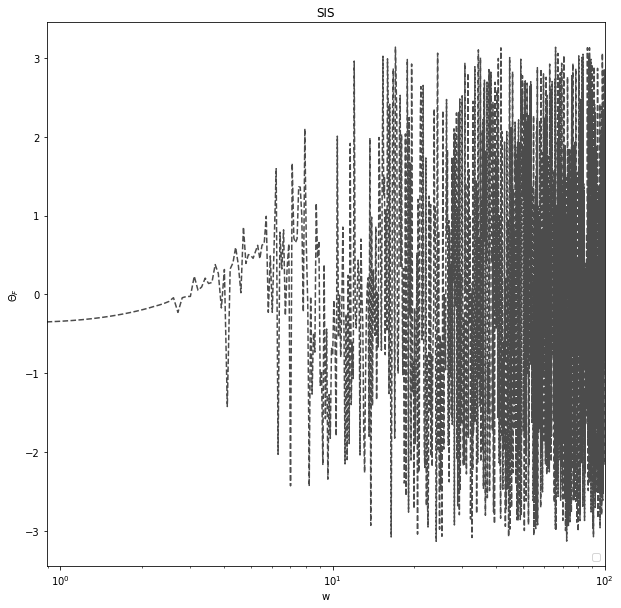

In [371]:
def create_plots (x_label, y_label, title):
    '''
    for idx, item in enumerate(label):
        subplot(x[idx],y[idx],label[idx])
    '''        
    #plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    plt.xscale('log')
    plt.legend(loc='lower right',prop={'size': 10})
    plt.yticks(size=10)
    plt.xticks(size=10)
    

    
plt.rcParams["figure.figsize"] = (10,10)
create_plots('w','$\Theta_F$','SIS')
plt.xlim(0, 100)
plt.plot(w,res_simple_phase,'--',label='python simple',color='k', alpha=0.7)
subplot(w,res_fixed_phase,label='python fixed',c='pink',style='-')
#plt.plot(w_math,abs_math, '-',label='mathematica result',color='pink',linewidth=1.2, alpha=0.8)
plt.plot(w,res_adaptive_phase,'.',label='python adaptive',color='cyan', alpha=0.2)
plt.legend()
plt.savefig('SIS_arg.png')


# w vs integration time in different ranges

In [ ]:
def create_plots (x_label, y_label, title):
    '''
    for idx, item in enumerate(label):
        subplot(x[idx],y[idx],label[idx])
    '''        
    #plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    
    plt.legend(loc='lower right',prop={'size': 10})
    plt.yticks(size=10)
    plt.xticks(size=10)

create_plots('w','time (s)','integration time')
subplot(w,df.time_simple.values,label='python simple',c='k', style='-')
subplot(w,df.time_fixed.values,label='python fixed',c='pink',style='-')
subplot(w,df.time_adaptive.values,label='python adaptive',c='cyan',style='-')
#plt.plot(w,res_adaptive,'.',label='python fixed',color='cyan', alpha=0.2)
plt.savefig('SIS_time.png')

# range vs result time in different ranges

In [ ]:
result_mathematica_01=[0.5 - 0.000208333j,0.499989 - 0.0020833j,0.498918 - 0.0207973j,0.401471 - 0.174582j,0.0220986 + 0.010906j]  
result_mathematica_04=[7.99997 + 0.0106666j,7.99691 + 0.106618j,7.69768 + 1.01875j,1.99384 - 0.934778j,0.154437 + 0.0608147j]
result_mathematica_06=[17.9996 + 0.0899984j,17.9563 + 0.898358j,14.1129 + 7.49035j,1.55844 - 0.713703j,0.141994 + 0.0735636j]
result_mathematica_08=[31.997 + 0.341313j,31.7059 + 3.39349j,11.6237 + 18.7993j,1.41083 - 0.562827j,0.142192 + 0.0684483j]


In [ ]:
result_mathematica=result_mathematica_01+result_mathematica_04+result_mathematica_06+result_mathematica_08

In [ ]:
res_real=[complex(df.result.values[j]).real for j in range(0,len(df.result.values))]
res_complex=[1j*complex(df.result.values[j]).imag for j in range(0,len(df.result.values))]
result_python=[res_real[j]+res_complex[j] for j in range(0,len(df.result.values))]

In [ ]:
diff_percent_real=[abs(result_mathematica[j]-result_python[j])/((result_mathematica[j]+result_python[j])/2).real*100 for j in range(0,len(df.result.values))]

diff_percent_imag=[abs(result_mathematica[j]-result_python[j])/((result_mathematica[j]+result_python[j])/2).imag*100 for j in range(0,len(df.result.values))]



In [ ]:
def create_plots (x_label, y_label, title):
    '''
    for idx, item in enumerate(label):
        subplot(x[idx],y[idx],label[idx])
    '''        
    #plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc='lower right',prop={'size': 10})
    plt.yticks(size=10)
    plt.xticks(size=10)
    
    
def subplot(x,y,label,c,style='--'):
    plt.xlim(50, 100)
    plt.plot(x,y, style, label=label, color=c, alpha=1,linewidth=1.2)
    #plt.plot(x,y, style)

    plt.legend()
    

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
create_plots('w','|F|','SIS')
subplot(w,res_simple,label='python simple',c='k')
subplot(w,res_fixed,label='python fixed',c='pink',style='-')
subplot(w,res_adaptive,label='python fixed',c='pink',style='-')
plt.plot(w_math,abs_math, '--',label='mathematica result',color='g',linewidth=0.5, alpha=0.8)
plt.legend()
plt.savefig('SIS_smaller_range.png')

In [14]:
(9*6 + 7*6 +8.5*3+8*6+7.5*27 +7*3+7.5*6+6.5*6+7.5*6+7*6+8.5*6) / (6*8+3+27+3)

7.592592592592593

No handles with labels found to put in legend.


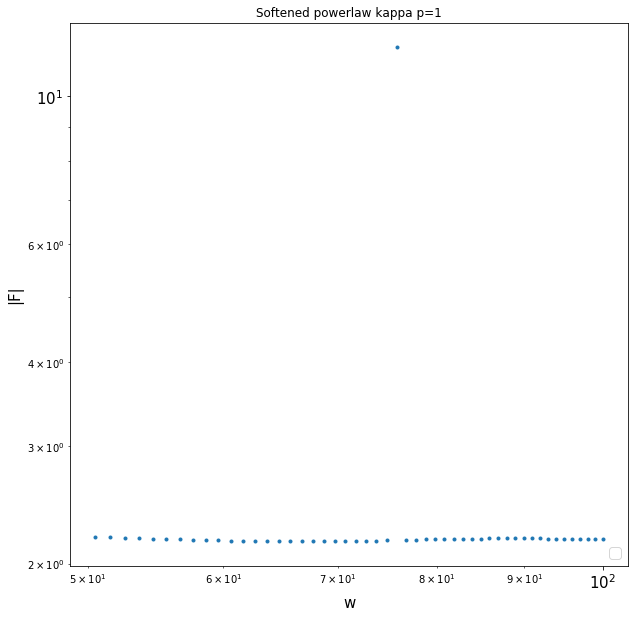

In [486]:
folder_pk='./Results/softenedpowerlawkappa/Levin*'
folders_list_pk=sorted(glob.glob(folder_pk))
bLin=[0]
folders_list_pk

put_labels('w','|F|','Softened powerlaw kappa p=1')
for fol,b in zip(folders_list_pk, bLin):

    dfpk=pd.read_csv(fol, sep="\t")   
    amp=[float(abs(complex(i))) for i in dfpk.res_adaptive.values]
    plt.plot(dfpk.w.values[50:],amp[50:],'.',label='b='+str(b))
    #plt.axvline(27)
    plt.xscale('log')
    plt.yscale('log')

    #plt.plot(SISRef.w.values,SISRefamp, 'k--', label='SIS',linewidth='0.5')
    plt.show()
    

In [487]:
a= np.asarray(amp)
np.where(a>6)[0]

array([75])

In [488]:
dfpk.w.values[74]

74.74772727272727

In [500]:
flag=[]
for k in range(len(a)-1):
    if abs(amp[k]-amp[k-1]) > 2. and  abs(amp[k]-amp[k+1])>2:
        flag.append(k)
        
amp_new=[amp.remove(f)  for f in flag]

In [501]:
flag[0]

75

In [7]:
pLin=np.linspace(-2,2, 5)
pLin

array([-2., -1.,  0.,  1.,  2.])